In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import rc, font_manager
import warnings
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_excel('주요관광지점 입장객(2004.07 이후)_231115094235.xls')

In [3]:
data.head()

,시도,군구,관광지,내/외국인,총계(2022.01 ~ 2022.12),2022년,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,NaN,NaN,NaN,NaN,인원계,2022년 01월,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월,2022년 12월
1,경기도,수원시,kbs수원센터(kbs수원아트홀),내국인,9860.0,9860,0,0,0,0,0,0,0,1994,1479,1924,1441,3022
2,경기도,수원시,kbs수원센터(kbs수원아트홀),합계,9860.0,9860,0,0,0,0,0,0,0,1994,1479,1924,1441,3022
3,경기도,수원시,경기대학교소성박물관,내국인,15711.0,15711,495,365,202,1327,1757,1027,412,0,3509,2366,2401,1850
4,경기도,수원시,경기대학교소성박물관,합계,15711.0,15711,495,365,202,1327,1757,1027,412,0,3509,2366,2401,1850


In [4]:
data.rename(columns={
    '2022년' : '2022년 계',
    'Unnamed: 6' : '2022년 01월',
    'Unnamed: 7' : '2022년 02월',
    'Unnamed: 8' : '2022년 03월',
    'Unnamed: 9' : '2022년 04월',
    'Unnamed: 10' : '2022년 05월',
    'Unnamed: 11' : '2022년 06월',
    'Unnamed: 12' : '2022년 07월',
    'Unnamed: 13' : '2022년 08월',
    'Unnamed: 14' : '2022년 09월',
    'Unnamed: 15' : '2022년 10월',
    'Unnamed: 16' : '2022년 11월',
    'Unnamed: 17' : '2022년 12월'
}, inplace=True)

In [5]:
data.drop(index=0, inplace=True)

In [6]:
data.fillna(0, inplace=True)

In [7]:
data

,시도,군구,관광지,내/외국인,총계(2022.01 ~ 2022.12),2022년 계,2022년 01월,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월,2022년 12월
1,경기도,수원시,kbs수원센터(kbs수원아트홀),내국인,9860.0,9860,0,0,0,0,0,0,0,1994,1479,1924,1441,3022
2,경기도,수원시,kbs수원센터(kbs수원아트홀),합계,9860.0,9860,0,0,0,0,0,0,0,1994,1479,1924,1441,3022
3,경기도,수원시,경기대학교소성박물관,내국인,15711.0,15711,495,365,202,1327,1757,1027,412,0,3509,2366,2401,1850
4,경기도,수원시,경기대학교소성박물관,합계,15711.0,15711,495,365,202,1327,1757,1027,412,0,3509,2366,2401,1850
5,경기도,수원시,서수원칠보체육관,내국인,53756.0,53756,6222,2842,5680,6825,552,3033,659,2730,1573,5579,7026,11035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,경기도,양평군,지평의병 지평리전투기념관,내국인,6976.0,6976,290,375,251,589,824,852,571,600,616,808,711,489
973,경기도,양평군,지평의병 지평리전투기념관,외국인,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
974,경기도,양평군,지평의병 지평리전투기념관,합계,6976.0,6976,290,375,251,589,824,852,571,600,616,808,711,489
975,경기도,양평군,화서기념관,내국인,4218.0,4218,196,245,310,361,345,385,385,385,340,525,495,246


In [8]:
data_local = data[['시도', '군구', '관광지']]
data_local = data_local.drop_duplicates().reset_index(drop=True)

In [9]:
len(data_local['군구'].unique())

28

In [10]:
people = pd.read_csv('tourist_data_for_tableau.csv')

In [11]:
peo = people[(people['기준년월'] > 20211231) & (people['기준년월'] < 20230101)]

In [12]:
peo_df = peo[peo['광역지자체'] == '경기']
peo_df.reset_index(drop=True,inplace=True)
peo_df.drop(columns='Unnamed: 0', inplace=True)
peo_df

C:\Users\woong\AppData\Local\Temp\ipykernel_11704\2420981920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peo_df.drop(columns='Unnamed: 0', inplace=True)


,기준년월,광역지자체,기초지자체,방문자 구분,방문자 수,요일코드,요일,code
0,20220101,경기,가평군,외부방문자(b+c),99564.0,5,토요일,경기 가평군
1,20220101,경기,고양시 덕양구,외부방문자(b+c),199794.0,5,토요일,경기 고양시 덕양구
2,20220101,경기,고양시 일산동구,외부방문자(b+c),150984.0,5,토요일,경기 고양시 일산동구
3,20220101,경기,고양시 일산서구,외부방문자(b+c),105842.0,5,토요일,경기 고양시 일산서구
4,20220101,경기,과천시,외부방문자(b+c),39012.0,5,토요일,경기 과천시
...,...,...,...,...,...,...,...,...
15325,20221231,경기,파주시,외부방문자(b+c),187578.0,5,토요일,경기 파주시
15326,20221231,경기,평택시,외부방문자(b+c),150798.0,5,토요일,경기 평택시
15327,20221231,경기,포천시,외부방문자(b+c),93604.0,5,토요일,경기 포천시
15328,20221231,경기,하남시,외부방문자(b+c),209972.0,5,토요일,경기 하남시


In [13]:
for i in peo_df.index:
    peo_df.loc[i, '기초지자체'] = peo_df.loc[i, '기초지자체'].split(' ')[0]

In [14]:
peo_df['기준년월'] = peo_df['기준년월'].astype('str')

C:\Users\woong\AppData\Local\Temp\ipykernel_11704\107338644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peo_df['기준년월'] = peo_df['기준년월'].astype('str')


In [15]:
for i in peo_df.index:
    peo_df.loc[i, '기준년월'] = peo_df.loc[i, '기준년월'][:-2]

In [16]:
peo_df

,기준년월,광역지자체,기초지자체,방문자 구분,방문자 수,요일코드,요일,code
0,202201,경기,가평군,외부방문자(b+c),99564.0,5,토요일,경기 가평군
1,202201,경기,고양시,외부방문자(b+c),199794.0,5,토요일,경기 고양시 덕양구
2,202201,경기,고양시,외부방문자(b+c),150984.0,5,토요일,경기 고양시 일산동구
3,202201,경기,고양시,외부방문자(b+c),105842.0,5,토요일,경기 고양시 일산서구
4,202201,경기,과천시,외부방문자(b+c),39012.0,5,토요일,경기 과천시
...,...,...,...,...,...,...,...,...
15325,202212,경기,파주시,외부방문자(b+c),187578.0,5,토요일,경기 파주시
15326,202212,경기,평택시,외부방문자(b+c),150798.0,5,토요일,경기 평택시
15327,202212,경기,포천시,외부방문자(b+c),93604.0,5,토요일,경기 포천시
15328,202212,경기,하남시,외부방문자(b+c),209972.0,5,토요일,경기 하남시


In [17]:
peo_data = peo_df[['기준년월', '광역지자체', '기초지자체', '방문자 수']]
peo_data = peo_data.groupby(['기준년월','광역지자체','기초지자체']).sum().reset_index()

In [18]:
peo_data

,기준년월,광역지자체,기초지자체,방문자 수
0,202201,경기,가평군,1712386.0
1,202201,경기,고양시,12927516.0
2,202201,경기,과천시,1434526.0
3,202201,경기,광명시,3082244.0
4,202201,경기,광주시,3597842.0
...,...,...,...,...
367,202212,경기,파주시,3942366.0
368,202212,경기,평택시,3806218.0
369,202212,경기,포천시,1842811.0
370,202212,경기,하남시,4599377.0


In [19]:
pivot_df = peo_data.pivot(index=['광역지자체', '기초지자체'], columns='기준년월', values='방문자 수').reset_index()
pivot_df.columns = pivot_df.columns.rename(None)
pivot_df.columns.name = None
pivot_df['합계'] = pivot_df.iloc[:, 2:].sum(axis=1)
pivot_df['평균'] = pivot_df.iloc[:, 2:-1].mean(axis=1)
pivot_df.loc[31] = pivot_df.loc[:, '202201':].sum()
pivot_df.loc[31, '광역지자체'] = '경기'
pivot_df.loc[31, '기초지자체'] = '합계'
pivot_df.loc[32] = pivot_df.loc[:30,'202201':].mean()
pivot_df.loc[32, '광역지자체'] = '경기'
pivot_df.loc[32, '기초지자체'] = '평균'

In [20]:
pivot_df

,광역지자체,기초지자체,202201,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211,202212,합계,평균
0,경기,가평군,1.712386e+06,1.563405e+06,1.565583e+06,2364735.0,2.826767e+06,2.882432e+06,3.473414e+06,3779743.0,2.579016e+06,2.811673e+06,1.977127e+06,1.491480e+06,2.902776e+07,2.418980e+06
1,경기,고양시,1.292752e+07,1.097997e+07,1.310974e+07,14313858.0,1.535917e+07,1.390705e+07,1.489955e+07,14547676.0,1.481315e+07,1.499008e+07,1.365214e+07,1.370527e+07,1.672052e+08,1.393377e+07
2,경기,과천시,1.434526e+06,1.182416e+06,1.536400e+06,2052801.0,2.045682e+06,1.629897e+06,1.692138e+06,1622659.0,1.815924e+06,2.044597e+06,1.695753e+06,1.431260e+06,2.018405e+07,1.682004e+06
3,경기,광명시,3.082244e+06,2.671175e+06,3.054335e+06,3370148.0,3.627141e+06,3.343472e+06,3.620074e+06,3456583.0,3.527973e+06,3.569642e+06,3.325057e+06,3.405012e+06,4.005286e+07,3.337738e+06
4,경기,광주시,3.597842e+06,3.005836e+06,3.464824e+06,4211384.0,4.220607e+06,3.783373e+06,4.298014e+06,4002803.0,4.170374e+06,4.680326e+06,4.214980e+06,3.369176e+06,4.701954e+07,3.918295e+06
5,경기,구리시,3.486830e+06,2.858030e+06,3.330575e+06,3913984.0,4.201655e+06,3.722162e+06,3.967596e+06,3849891.0,4.064219e+06,4.083111e+06,3.693667e+06,3.624064e+06,4.479578e+07,3.732982e+06
6,경기,군포시,2.044368e+06,1.723770e+06,2.035443e+06,2213883.0,2.300259e+06,2.079499e+06,2.216550e+06,2127975.0,2.311761e+06,2.268528e+06,2.119454e+06,2.120863e+06,2.556235e+07,2.130196e+06
7,경기,김포시,4.032354e+06,3.438922e+06,4.079368e+06,4214280.0,4.603062e+06,4.248732e+06,4.437964e+06,4271778.0,4.688393e+06,4.792980e+06,4.137270e+06,4.020191e+06,5.096529e+07,4.247108e+06
8,경기,남양주시,5.333469e+06,4.643348e+06,5.537912e+06,6389977.0,6.716811e+06,6.059499e+06,6.509990e+06,6517776.0,6.807380e+06,6.815922e+06,6.006813e+06,5.326206e+06,7.266510e+07,6.055425e+06
9,경기,동두천시,7.134820e+05,5.992680e+05,7.248780e+05,842179.0,8.594670e+05,7.636930e+05,8.629890e+05,817641.0,9.022380e+05,8.872380e+05,7.806040e+05,7.113150e+05,9.464992e+06,7.887493e+05


In [21]:
basic_local = pivot_df[pivot_df['기초지자체']  != '합계']
basic_local = basic_local[basic_local['기초지자체'] != '평균']
gyeonggi = pivot_df[pivot_df['기초지자체']  == '합계'].reset_index(drop=True)
gyeonggi_mean = pivot_df[pivot_df['기초지자체']  == '평균'].reset_index(drop=True)

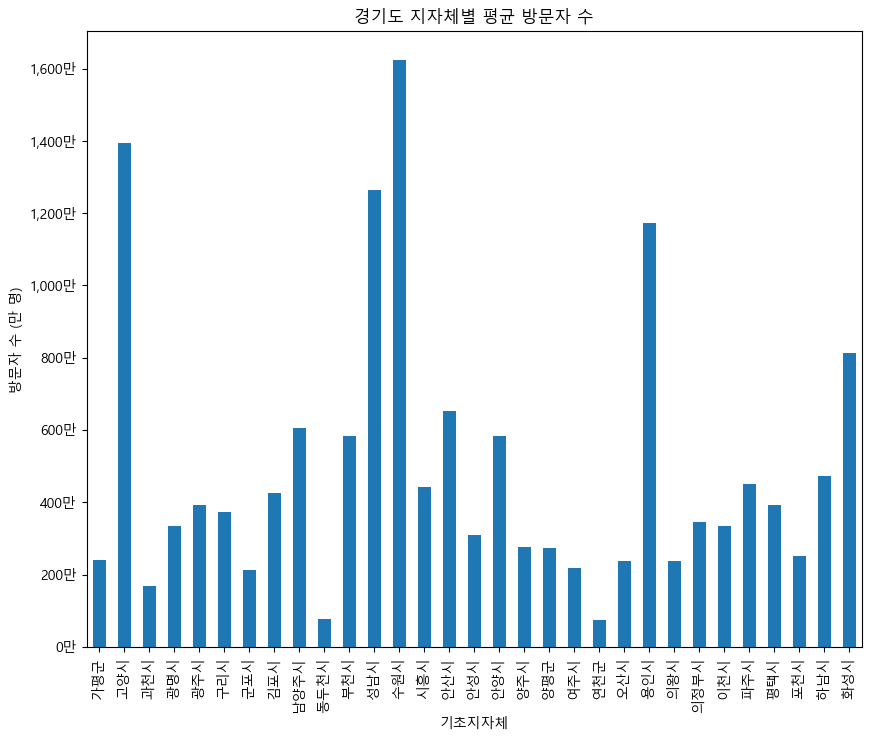

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
basic_local.plot(x='기초지자체', y='평균', kind='bar', ax=ax, legend=False)

# y축 포매터 변경 (만 명 단위)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e4):,}만'))

# 그래프에 레이블 추가
plt.title('경기도 지자체별 평균 방문자 수')
plt.xlabel('기초지자체')
plt.ylabel('방문자 수 (만 명)')

# 그래프 출력
plt.show()

In [74]:
sort_basic_local = basic_local.sort_values('합계')

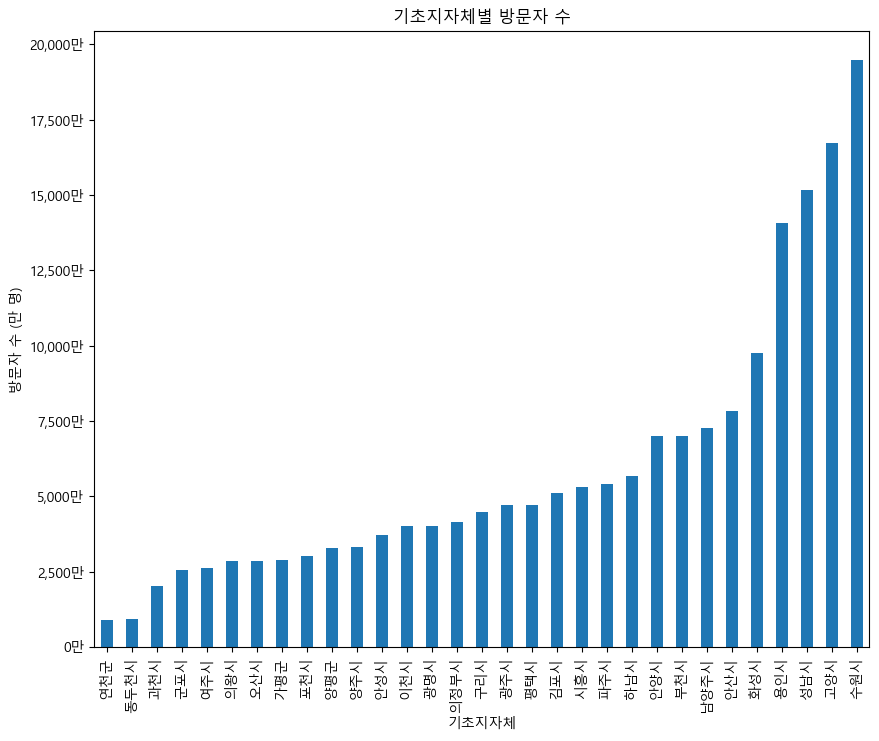

In [75]:
fig, ax = plt.subplots(figsize=(10, 8))
sort_basic_local.plot(x='기초지자체', y='합계', kind='bar', ax=ax, legend=False)

# y축 포매터 변경 (만 명 단위)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e4):,}만'))

# 그래프에 레이블 추가
plt.title('기초지자체별 방문자 수')
plt.xlabel('기초지자체')
plt.ylabel('방문자 수 (만 명)')

# 그래프 출력
plt.show()

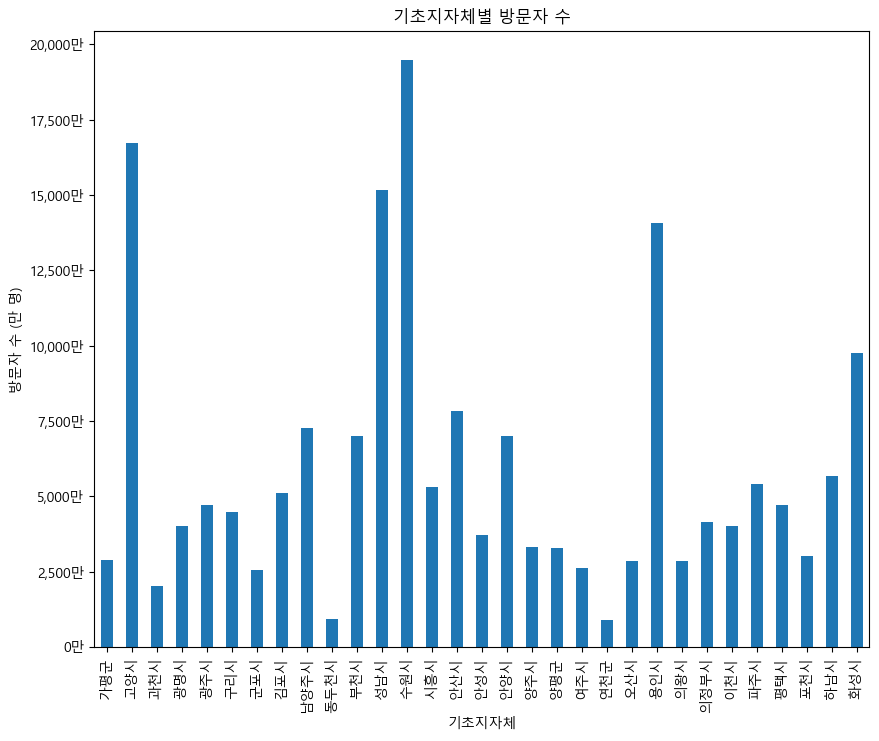

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
basic_local.plot(x='기초지자체', y='합계', kind='bar', ax=ax, legend=False)

# y축 포매터 변경 (만 명 단위)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e4):,}만'))

# 그래프에 레이블 추가
plt.title('기초지자체별 방문자 수')
plt.xlabel('기초지자체')
plt.ylabel('방문자 수 (만 명)')

# 그래프 출력
plt.show()

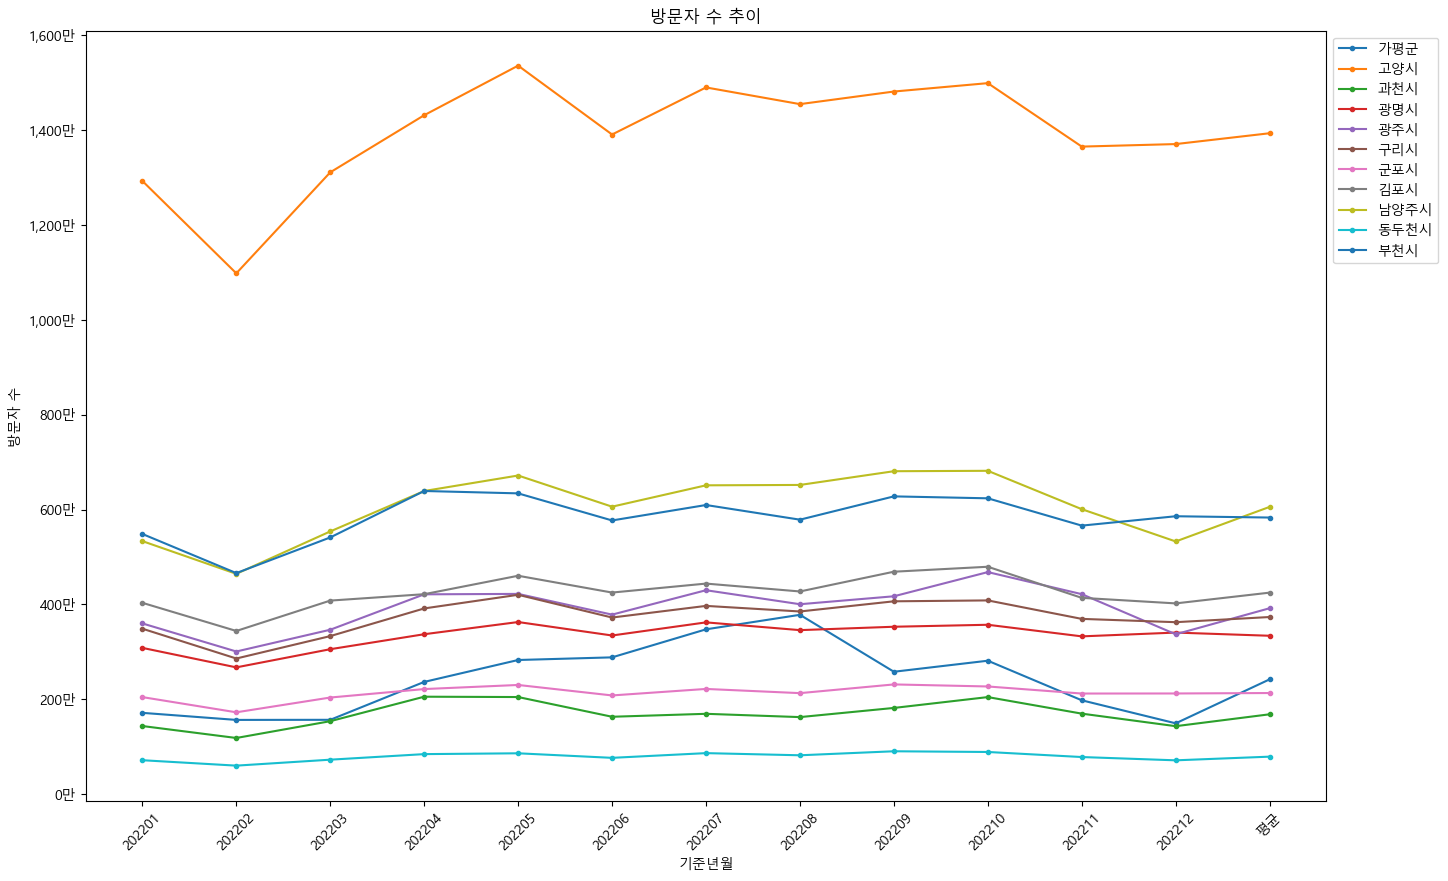

In [24]:
df_no_total = basic_local.drop(columns=['합계'])
df_no_total = df_no_total.loc[:10]
# plt.figure(figsize=(16,10))
# line chart 생성
fig, ax = plt.subplots(figsize=(16,10))

for idx, row in df_no_total.iterrows():
    ax.plot(row.index[2:], row.values[2:], label=row['기초지자체'], marker='.')

# 색상 팔레트를 적용하여 다양한 색상 적용
ax.set_prop_cycle(color=plt.cm.tab10.colors)

# y축 포매팅 변경 (만 명 단위)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e4):,}만'))

# 그래프에 레이블 추가
plt.title('방문자 수 추이')
plt.xlabel('기준년월')
plt.ylabel('방문자 수')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

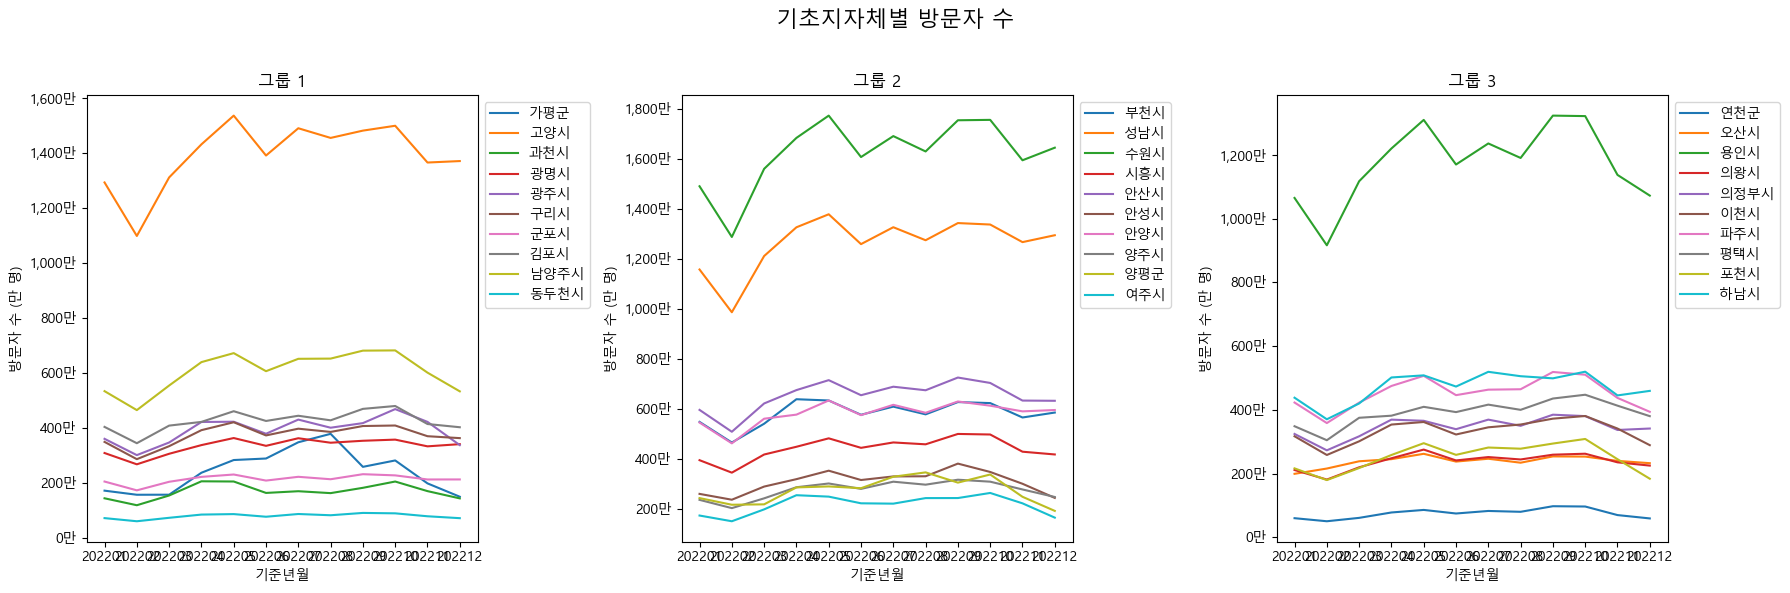

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 데이터프레임 생성 (주어진 데이터를 여기에 추가)
df = basic_local.drop(columns=['합계','평균'])
# 기초지자체를 x축, 합계를 y축으로 하는 라인 차트
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# 각 라인에 대해 다른 색상 지정
colors = plt.cm.tab10.colors

# 10개씩 데이터를 나누어 그림
for i, (start, end) in enumerate([(0, 10), (10, 20), (20, 30)]):
    ax = axes[i]
    
    for idx, row in df.iloc[start:end].iterrows():
        ax.plot(row.index[2:], row.values[2:], label=row['기초지자체'], color=colors[idx % len(colors)])

    # y축 포매터 변경 (만 명 단위)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e4):,}만'))

    # 서브플롯에 레이블 추가
    ax.set_title(f'그룹 {i + 1}')
    ax.set_xlabel('기준년월')
    ax.set_ylabel('방문자 수 (만 명)')

# 범례 표시
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[2].legend(loc='upper left', bbox_to_anchor=(1, 1))

# 그림의 제목 추가
plt.suptitle('기초지자체별 방문자 수', fontsize=16)

# 조정된 레이아웃으로 그래프 출력
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


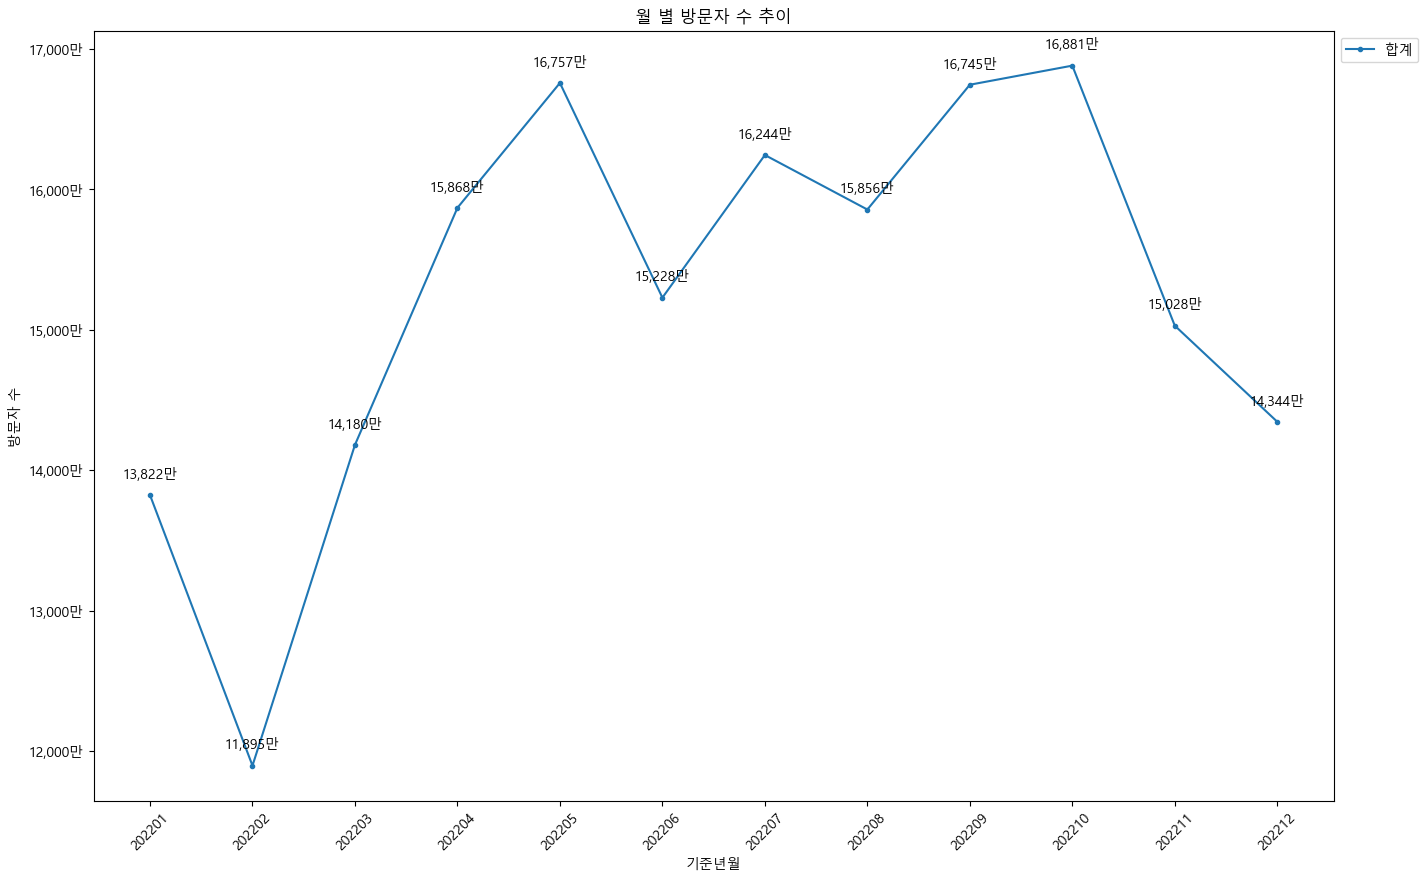

In [26]:

df_no_total = gyeonggi.drop(columns=['합계','평균'])
# plt.figure(figsize=(16,10))
# line chart 생성
fig, ax = plt.subplots(figsize=(16,10))
for idx, row in df_no_total.iterrows():
    ax.plot(row.index[2:], row.values[2:], label=row['기초지자체'], marker='.')

    for i, txt in enumerate(row.values[2:]):
        ax.annotate(f'{int(txt/1e4):,}만',
                    xy=(row.index[2:][i], txt),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom')
        

# y축 포매팅 변경 (만 명 단위)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e4):,}만'))

# 그래프에 레이블 추가
plt.title('월 별 방문자 수 추이')
plt.xlabel('기준년월')
plt.ylabel('방문자 수')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

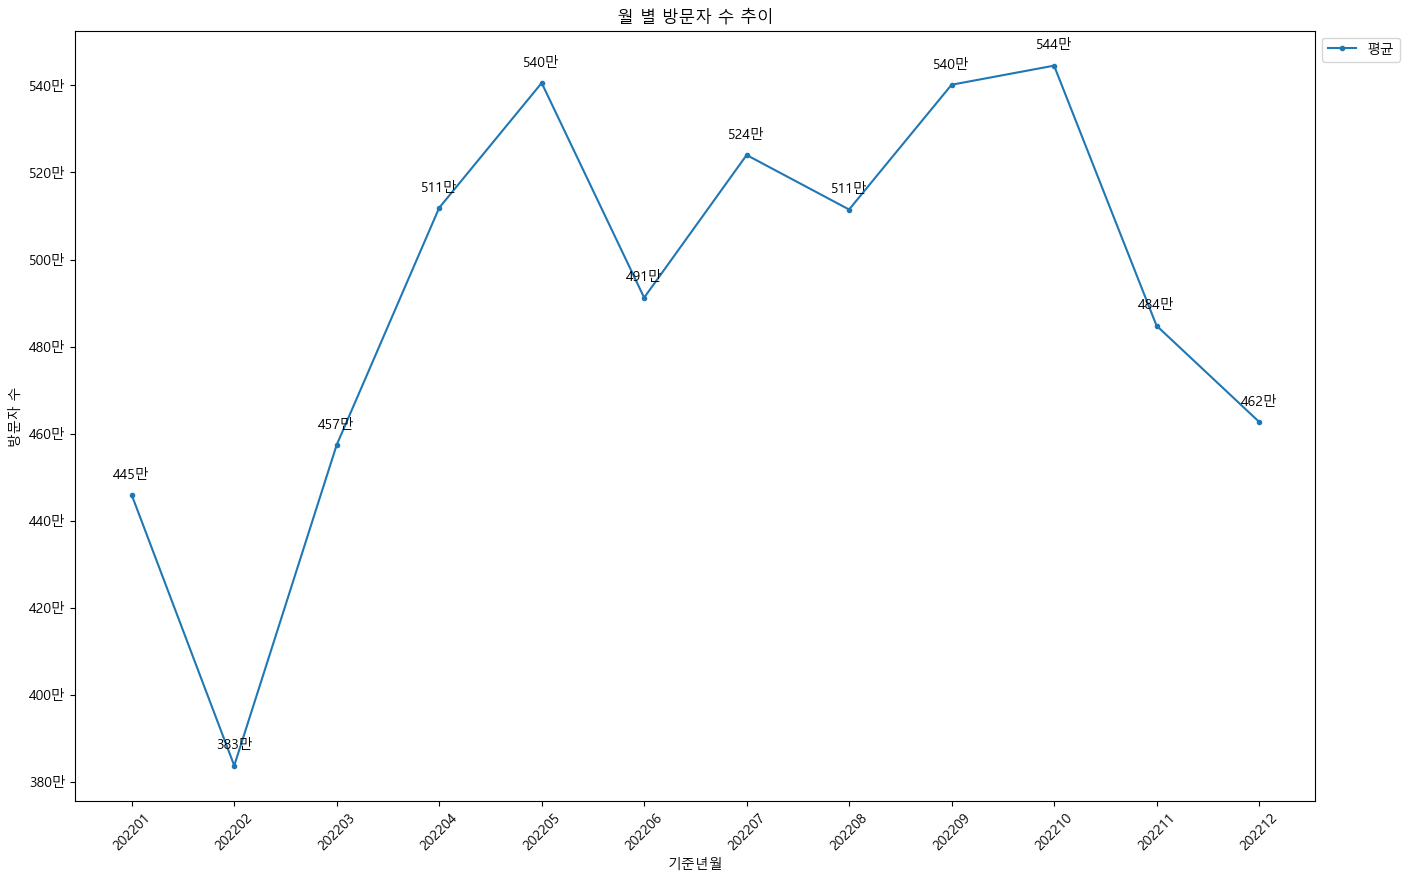

In [27]:

df_no_total = gyeonggi_mean.drop(columns=['합계','평균'])
# plt.figure(figsize=(16,10))
# line chart 생성
fig, ax = plt.subplots(figsize=(16,10))
for idx, row in df_no_total.iterrows():
    ax.plot(row.index[2:], row.values[2:], label=row['기초지자체'], marker='.')

    for i, txt in enumerate(row.values[2:]):
        ax.annotate(f'{int(txt/1e4):,}만',
                    xy=(row.index[2:][i], txt),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom')
        

# y축 포매팅 변경 (만 명 단위)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e4):,}만'))

# 그래프에 레이블 추가
plt.title('월 별 방문자 수 추이')
plt.xlabel('기준년월')
plt.ylabel('방문자 수')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [28]:
search_all = pd.read_csv("검색건수 추이.csv", encoding='euc-kr')

In [29]:
domestic_spending = pd.read_csv("관광소비 추이.csv", encoding='euc-kr')
domestic_spending['구분'] = '내국인'

In [30]:
foreigner_spending= pd.read_csv("20231115094212_관광소비 추이.csv", encoding='euc-kr')
foreigner_spending.drop(columns='Unnamed: 3', inplace=True)
foreigner_spending['구분'] = '외국인'

In [31]:
spending = pd.concat([domestic_spending, foreigner_spending],axis=0).reset_index(drop=True)

In [71]:
spending

,기준년월,광역지자체,중분류,지출액,전년도 지출액,구분
0,202201,경기도,관광총소비,650547882.0,493325075.0,내국인
1,202201,경기도,호텔,1017347.0,604678.0,내국인
2,202201,경기도,콘도,593820.0,252285.0,내국인
3,202201,경기도,캠핑장/펜션,153638.0,76222.0,내국인
4,202201,경기도,기타숙박,10792007.0,9799123.0,내국인
...,...,...,...,...,...,...
475,202212,경기도,골프장,187534.0,252934.0,외국인
476,202212,경기도,스키장,0.0,10887.0,외국인
477,202212,경기도,기타레저,603.0,280.0,외국인
478,202212,경기도,문화서비스,347895.0,79849.0,외국인


In [32]:
total_spending = spending[spending['중분류'] == '관광총소비'].reset_index(drop=True)
total_spending_df = total_spending[['기준년월','지출액']]
total_spending_df = total_spending_df.groupby('기준년월').sum().reset_index()
total_spending_df['기준년월'] = total_spending_df['기준년월'].astype('str')
total_spending_df

,기준년월,지출액
0,202201,661464317.0
1,202202,570193389.0
2,202203,709940591.0
3,202204,844217825.0
4,202205,931241044.0
5,202206,863655684.0
6,202207,886707714.0
7,202208,839877829.0
8,202209,855403383.0
9,202210,958586888.0


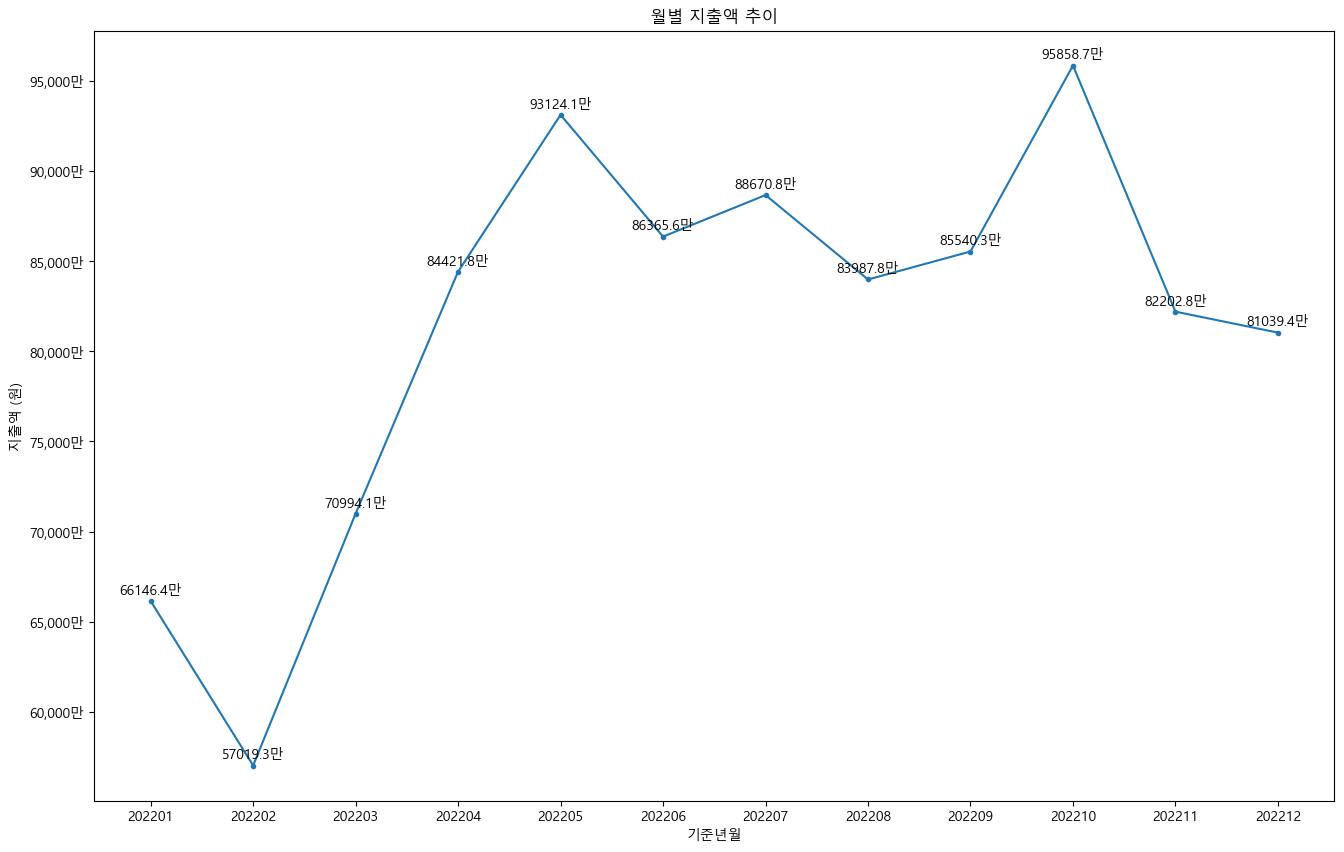

In [33]:
# 라인 차트 생성
fig, ax = plt.subplots(figsize=(16, 10))
line = ax.plot(total_spending_df['기준년월'], total_spending_df['지출액'], marker='.', linestyle='-')

# 그래프에 레이블 추가
plt.title('월별 지출액 추이')
plt.xlabel('기준년월')
plt.ylabel('지출액 (원)')

# y축 포매팅 변경 (만 원 단위)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e4):,}만'))

# 그래프에 값 표시 (만 원 단위)
for xi, yi in zip(total_spending_df['기준년월'], total_spending_df['지출액']):
    plt.annotate(f'{yi / 1e4:.1f}만', (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xticks(total_spending_df['기준년월'])

# 그래프 표시
plt.show()

In [34]:
spending[spending['기준년월'] == 202201]

,기준년월,광역지자체,중분류,지출액,전년도 지출액,구분
0,202201,경기도,관광총소비,650547882.0,493325075.0,내국인
1,202201,경기도,호텔,1017347.0,604678.0,내국인
2,202201,경기도,콘도,593820.0,252285.0,내국인
3,202201,경기도,캠핑장/펜션,153638.0,76222.0,내국인
4,202201,경기도,기타숙박,10792007.0,9799123.0,내국인
5,202201,경기도,여행업,85189.0,82660.0,내국인
6,202201,경기도,육상운송,3859718.0,3211690.0,내국인
7,202201,경기도,수상운송,12787.0,13233.0,내국인
8,202201,경기도,렌터카,5343418.0,3448561.0,내국인
9,202201,경기도,면세점,124.0,200.0,내국인


In [35]:
search = pd.read_csv("지역별 검색건수.csv", encoding='euc-kr')

In [36]:
search_all[search_all['기준년월'] == 202201]

,기준년월,광역지자체,카테고리중분류명,광역지자체 검색건수,광역지자체 전년도 검색건수
0,202201,경기도,전체,7301976,5855867
1,202201,경기도,자연관광,182564,205175
2,202201,경기도,역사관광,149811,141960
3,202201,경기도,체험관광,40889,24465
4,202201,경기도,문화관광,747667,577700
5,202201,경기도,레저스포츠,429225,296999
6,202201,경기도,쇼핑,1585076,1316017
7,202201,경기도,음식,3182113,2491881
8,202201,경기도,숙박,485680,375555
9,202201,경기도,기타관광,498951,426115


In [66]:
month_total_search = search_all[search_all['카테고리중분류명'] == '전체'].reset_index()
month_total_search['기준년월'] = month_total_search['기준년월'].astype('str')

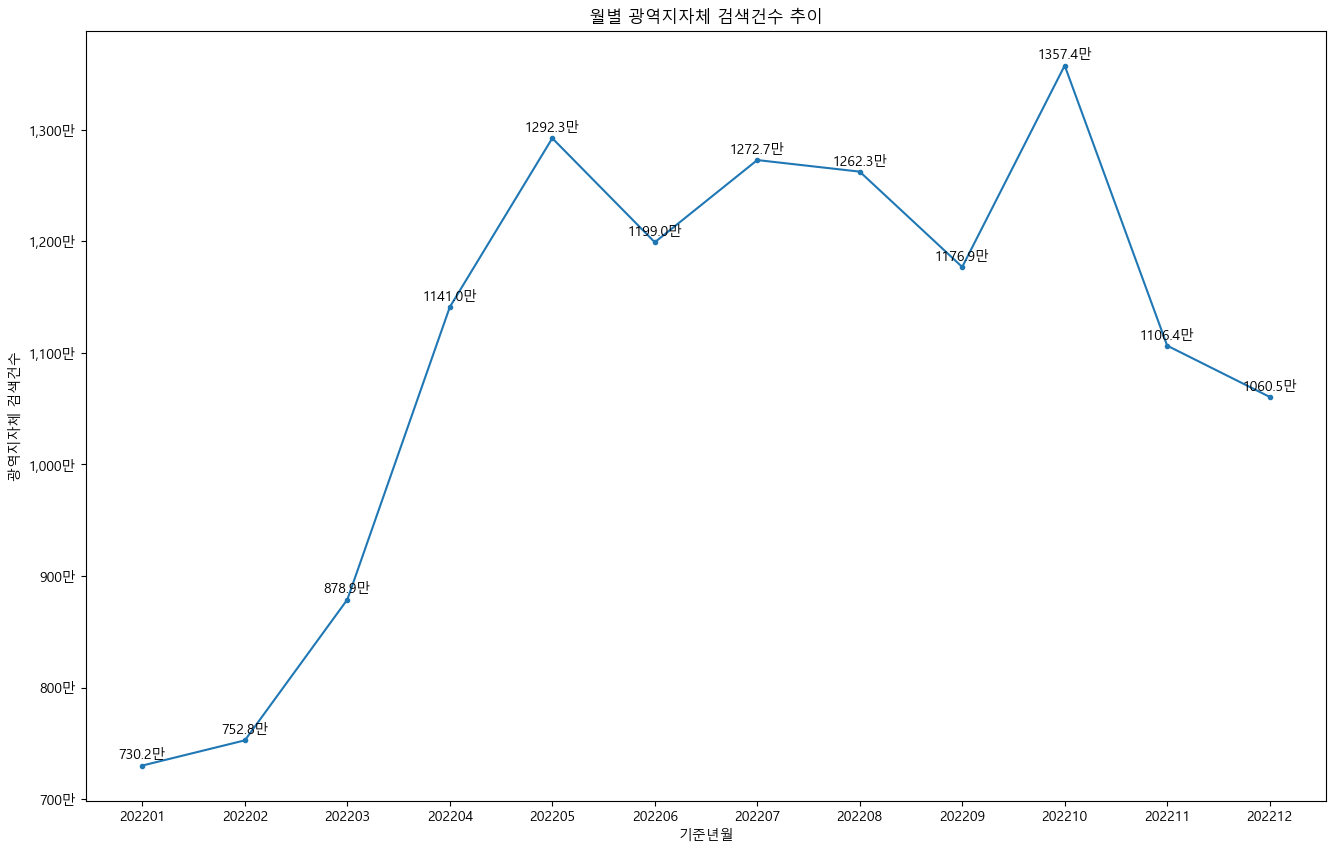

In [67]:
# 라인 차트 생성
fig, ax = plt.subplots(figsize=(16, 10))
line = ax.plot(month_total_search['기준년월'], month_total_search['광역지자체 검색건수'], marker='.', linestyle='-')

# 그래프에 레이블 추가
plt.title('월별 광역지자체 검색건수 추이')
plt.xlabel('기준년월')
plt.ylabel('광역지자체 검색건수')

# y축 포매팅 변경 (만 원 단위)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e4):,}만'))

# 그래프에 값 표시 (만 원 단위)
for xi, yi in zip(month_total_search['기준년월'], month_total_search['광역지자체 검색건수']):
    plt.annotate(f'{yi / 1e4:.1f}만', (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xticks(month_total_search['기준년월'])

# 그래프 표시
plt.show()

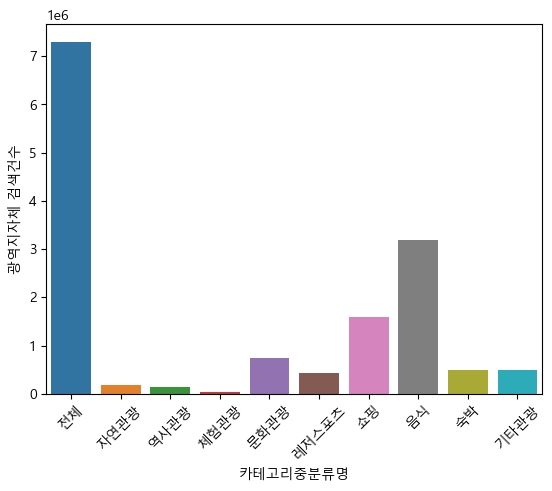

In [37]:
sns.barplot(data = search_all[search_all['기준년월'] == 202201], x='카테고리중분류명', y='광역지자체 검색건수')
plt.xticks(rotation=45)
plt.show()

In [44]:
total_search = search[['기초지자체','기초지자체 검색건수']]
total_search['기초지자체'] = total_search['기초지자체'].apply(lambda x : x.split(" ")[0])
# total_search.drop_duplicates(inplace=True)
total_search = total_search.groupby('기초지자체').sum().reset_index()

C:\Users\woong\AppData\Local\Temp\ipykernel_11704\2266096932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_search['기초지자체'] = total_search['기초지자체'].apply(lambda x : x.split(" ")[0])


,기초지자체,기초지자체 검색건수
0,가평군,32386203
1,고양시,106198623
2,과천시,12332655
3,광명시,27216162
4,광주시,31848714
5,구리시,15861285
6,군포시,6466320
7,김포시,41578866
8,남양주시,61023879
9,동두천시,4507677


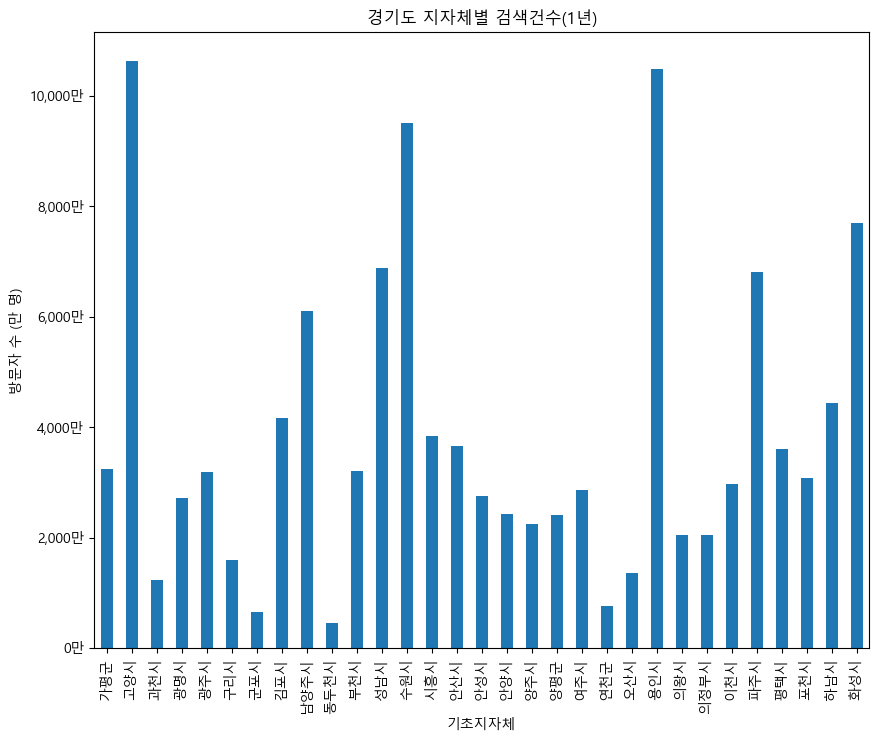

In [46]:
fig, ax = plt.subplots(figsize=(10, 8))
total_search.plot(x='기초지자체', y='기초지자체 검색건수', kind='bar', ax=ax, legend=False)

# y축 포매터 변경 (만 명 단위)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e4):,}만'))

# 그래프에 레이블 추가
plt.title('경기도 지자체별 검색건수(1년)')
plt.xlabel('기초지자체')
plt.ylabel('방문자 수 (만 명)')

# 그래프 출력
plt.show()

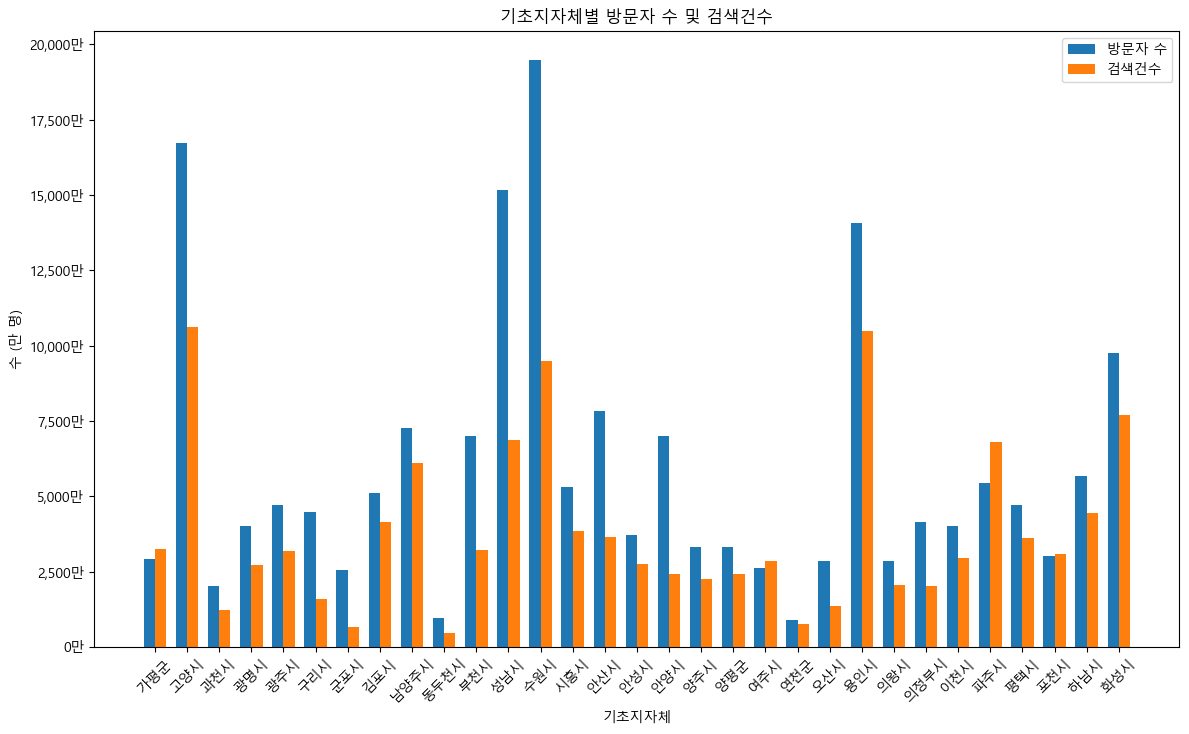

In [48]:
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the first bar chart
bar_width = 0.35  # 필요에 따라 조정
bar1 = ax.bar(basic_local.index - bar_width/2, basic_local['합계']/1e4, bar_width, label='방문자 수')

# Plot the second bar chart
bar2 = ax.bar(total_search.index + bar_width/2, total_search['기초지자체 검색건수']/1e4, bar_width, label='검색건수')

# x축 레이블 및 눈금 설정
ax.set_xticks(basic_local.index)
ax.set_xticklabels(basic_local['기초지자체'])

# y축 포매터 설정 (만 명 단위)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}만'))

# 레이블 및 제목 추가
plt.xlabel('기초지자체')
plt.ylabel('수 (만 명)')
plt.title('기초지자체별 방문자 수 및 검색건수')
plt.xticks(rotation=45)

# 범례 표시
ax.legend()

# 결합된 그래프 표시
plt.show()

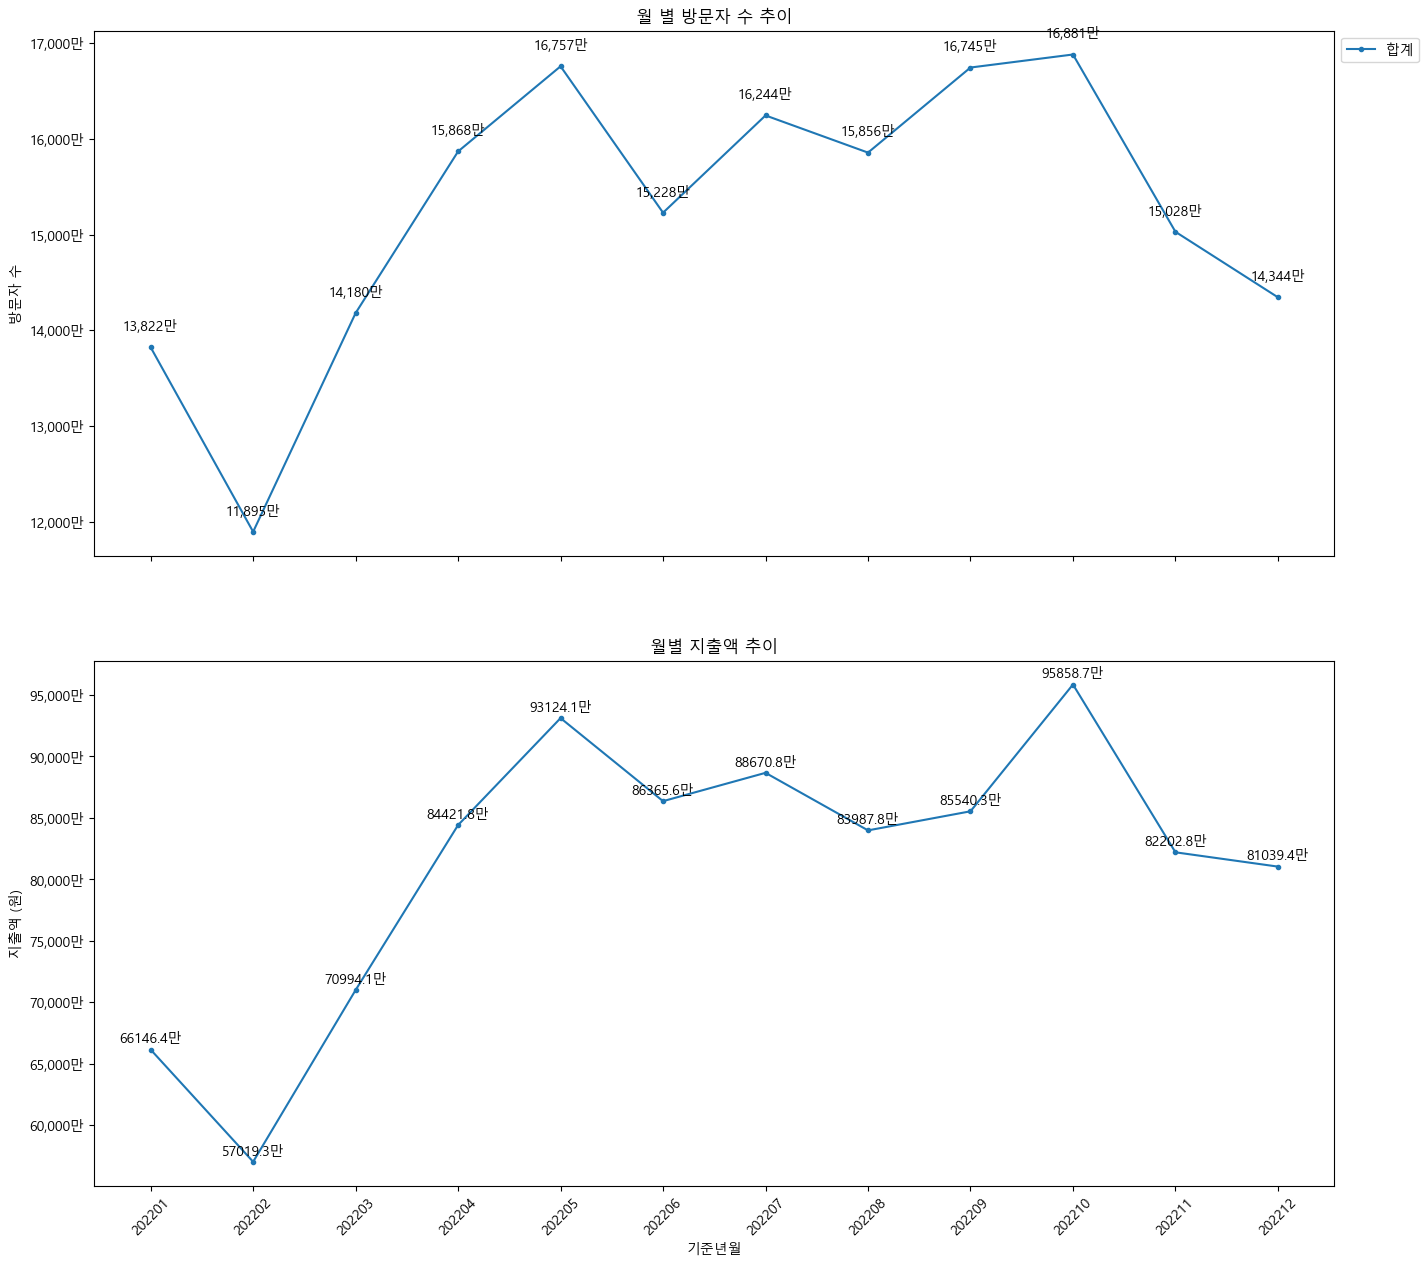

In [60]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# df_no_total 차트 생성

df_no_total = gyeonggi.drop(columns=['합계','평균'])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 15), sharex=True)

for idx, row in df_no_total.iterrows():
    ax1.plot(row.index[2:], row.values[2:], label=row['기초지자체'], marker='.')

    for i, txt in enumerate(row.values[2:]):
        ax1.annotate(f'{int(txt/1e4):,}만',
                     xy=(row.index[2:][i], txt),
                     xytext=(0, 10),
                     textcoords='offset points',
                     ha='center', va='bottom')

# y축 포매팅 변경 (만 명 단위)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e4):,}만'))

# 그래프에 레이블 추가
ax1.set_title('월 별 방문자 수 추이')
ax1.set_ylabel('방문자 수')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.tick_params(axis='x', rotation=45)

# total_spending_df 차트 생성
line = ax2.plot(total_spending_df['기준년월'], total_spending_df['지출액'], marker='.', linestyle='-')

# 그래프에 레이블 추가
ax2.set_title('월별 지출액 추이')
ax2.set_xlabel('기준년월')
ax2.set_ylabel('지출액 (원)')

# y축 포매팅 변경 (만 원 단위)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e4):,}만'))

# 그래프에 값 표시 (만 원 단위)
for xi, yi in zip(total_spending_df['기준년월'], total_spending_df['지출액']):
    ax2.annotate(f'{yi / 1e4:.1f}만', (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')

ax2.set_xticks(total_spending_df['기준년월'])
ax2.tick_params(axis='x', rotation=45)

# 그래프 표시
plt.show()


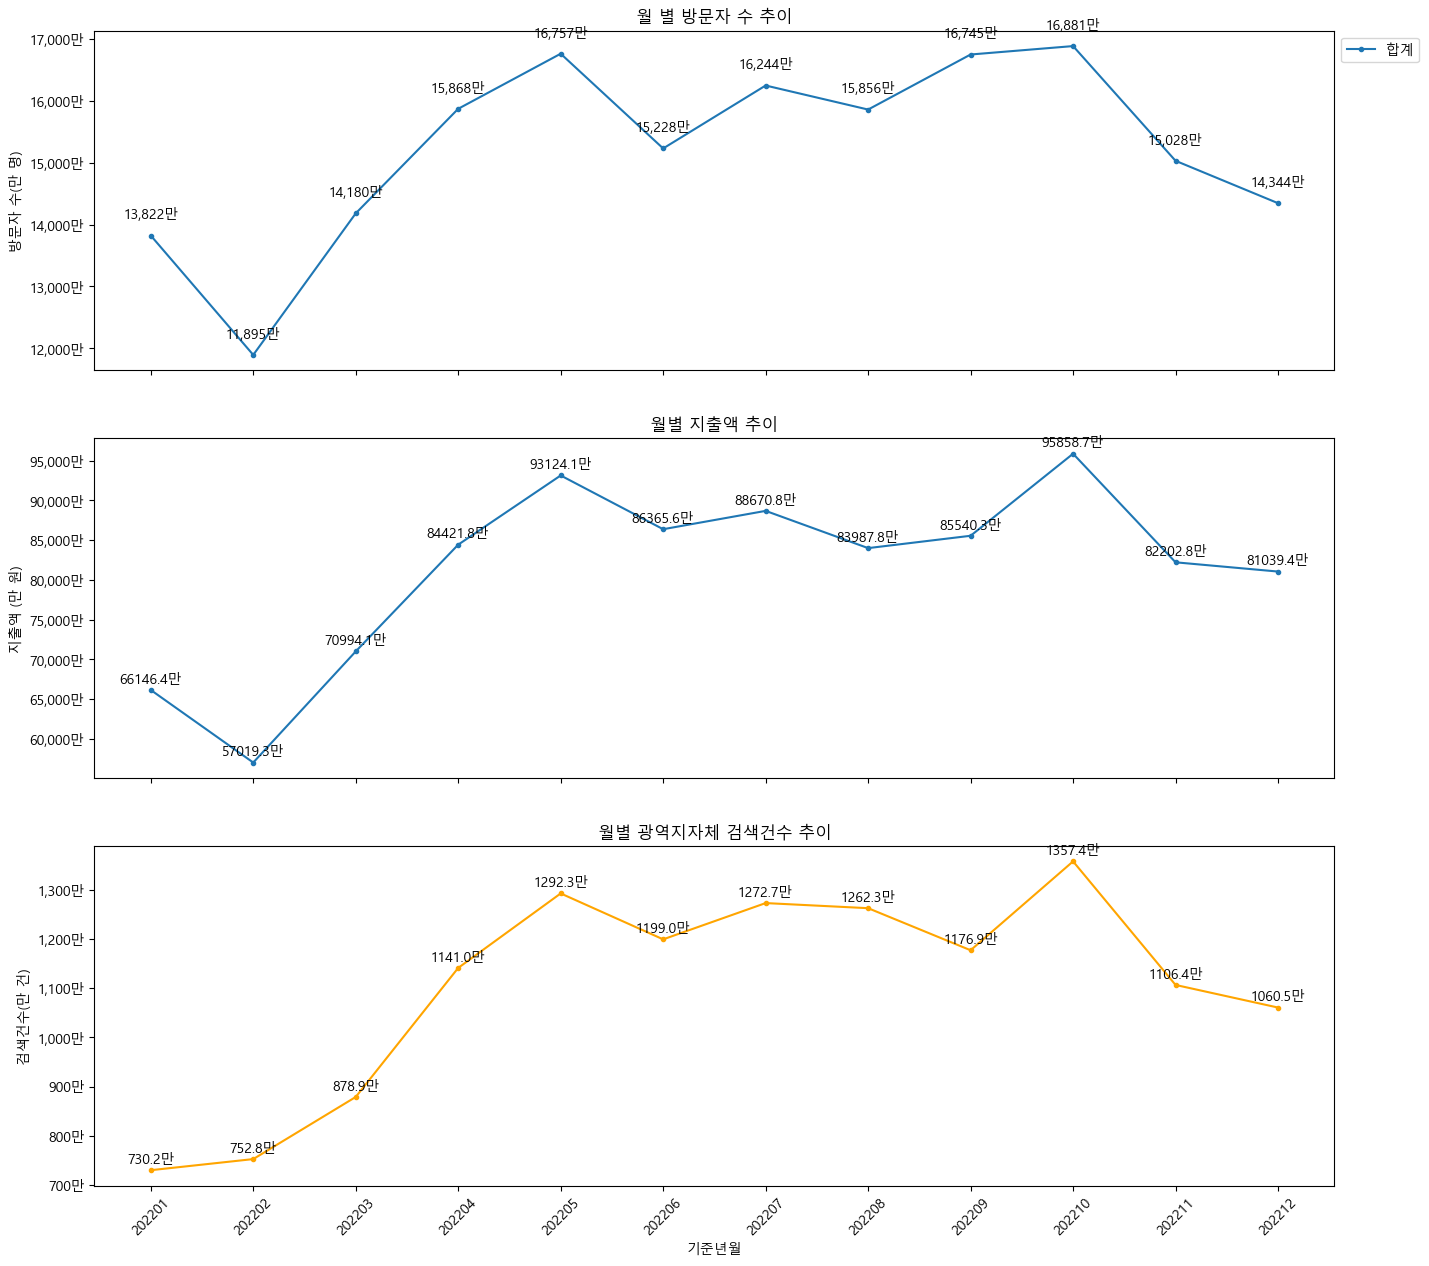

In [70]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# df_no_total 차트 생성
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 15), sharex=True)

# Plot the first line chart for df_no_total
for idx, row in df_no_total.iterrows():
    ax1.plot(row.index[2:], row.values[2:], label=row['기초지자체'], marker='.')

    for i, txt in enumerate(row.values[2:]):
        ax1.annotate(f'{int(txt/1e4):,}만',
                     xy=(row.index[2:][i], txt),
                     xytext=(0, 10),
                     textcoords='offset points',
                     ha='center', va='bottom')

# y-axis formatting (만 명 단위)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e4):,}만'))

# Add labels and title
ax1.set_title('월 별 방문자 수 추이')
ax1.set_ylabel('방문자 수(만 명)')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.tick_params(axis='x', rotation=45)

# Plot the second line chart for total_spending_df
line2 = ax2.plot(total_spending_df['기준년월'], total_spending_df['지출액'], marker='.', linestyle='-', label='지출액')

# y-axis formatting (만 원 단위)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e4):,}만'))

# Add labels and title for the second line chart
ax2.set_title('월별 지출액 추이')
ax2.set_ylabel('지출액 (만 원)')

# Add value annotations for the second line chart
for xi, yi in zip(total_spending_df['기준년월'], total_spending_df['지출액']):
    ax2.annotate(f'{yi / 1e4:.1f}만', (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')

ax2.set_xticks(total_spending_df['기준년월'])
ax2.tick_params(axis='x', rotation=45)

# Plot the third line chart for month_total_search
line3 = ax3.plot(month_total_search['기준년월'], month_total_search['광역지자체 검색건수'], marker='.', linestyle='-', color='orange', label='광역지자체 검색건수')

# Add labels and title for the third line chart
ax3.set_title('월별 광역지자체 검색건수 추이')
ax3.set_xlabel('기준년월')
ax3.set_ylabel('검색건수(만 건)')

# y-axis formatting (만 건 단위)
ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1e4):,}만'))

# Add value annotations for the third line chart
for xi, yi in zip(month_total_search['기준년월'], month_total_search['광역지자체 검색건수']):
    ax3.annotate(f'{yi / 1e4:.1f}만', (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')

ax3.tick_params(axis='x', rotation=45)

# Show the combined plot
plt.show()
